# One dimensional scattering

<a href="https://colab.research.google.com/github/korsakjakub/kwant-tutorials-zps/blob/master/2022-10-01-One%20Dimensional%20Scattering%20in%20Kwant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp37-cp37m-linux_x86_64.whl size=3690988 sha256=a2caedcbbdfcd8e72ec10080de4c8b76ee640bb08b93900c071925faf3d66bca
  Stored in directory: /root/.cache/pip/wheels/d6/2d/93/6f395cd3f0798d7d9e161dce1c8b8c8bbd04d4547763c926de
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp37-cp37m-linux_x86_64.whl size=227924 sha256=152a05026dd06a9c25cdb873b4af739f7e1c6253fc273d1b0175f07cab8a846d
  Stored in directory: /root/.cache/pip/wheels/85/c6/1c/6939e2931cfbff5df75758a06084bf67171b640ebdf5febd35
Successfully built kwant tinyarray


/usr/local/lib/python3.7/dist-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


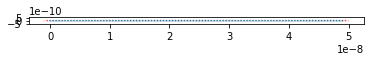

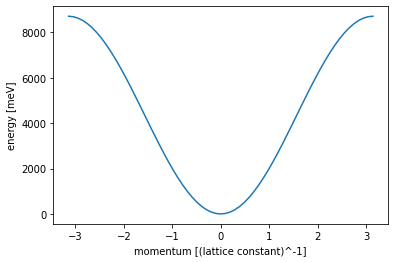

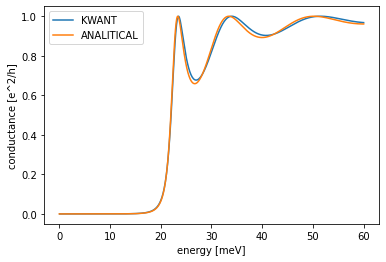

In [ ]:
import kwant
import matplotlib.pyplot as plt
import numpy as np


JtomeV=6.242*10**21
mevtoJ=JtomeV**(-1)


hbar=1.0545718 * 10**(-34) #m^2 kg/s


hbarr=6.58211*10**(-13) #meV s

me=9.10938356 * 10**(-31) #kg

mc=1.782*10**(-36) ##eV/c^2 = mc kg

c=3*10**8

a=0.5*10**(-9) #m

meff=0.07 #non dim

t=(hbar)**2/(2*meff*me*a**2)*JtomeV #j->mev


l=5*10**(-8)


L=int(l/a)



#t=1
#a=1

v0=20


syst = kwant.Builder()
lat = kwant.lattice.chain(a)


def v(x,p=L/10. ,k=9*(L/10.) , V=v0):
    if(x<p):
        return 0
    if(x>=p and x<=k):
        return V
    if(x>k):
        return 0
    
    
def v_g(x, v=v0, w=2*L/5. , n=50,V=v0):
    return V*np.exp(-((x-L/2.)/w)**n)


#build
for i in range(L):
    
    syst[lat(i)] = 2*t+ v_g(i)
    
    #hopping
    if (i>0):
        syst[lat(i),lat(i-1)]=-t
        
#left lead  

sym_left_lead = kwant.TranslationalSymmetry([-a])
left_lead = kwant.Builder(sym_left_lead)

left_lead[lat(0)]=2*t
left_lead[lat(0),lat(1)]=-t


syst.attach_lead(left_lead)

#right lead  


sym_right_lead = kwant.TranslationalSymmetry([a])
right_lead = kwant.Builder(sym_right_lead)


right_lead[lat(0)]=2*t
right_lead[lat(0),lat(1)]=-t


syst.attach_lead(right_lead)


right_lead=right_lead.finalized()

kwant.plot(syst)




syst=syst.finalized()

kwant.plotter.bands(right_lead, show=False)
plt.xlabel("momentum [(lattice constant)^-1]")
plt.ylabel("energy [meV]")
plt.show()


energies=[]
data=[]






n=800
Emax=3*v0
for ie in range(n):
    energy=Emax*(ie+1)/n #mev
    
    smatrix=kwant.smatrix(syst,energy)
    
    energies.append(energy )
    data.append(smatrix.transmission(1,0))


plt.figure()
plt.plot(energies, data,label="KWANT")
plt.xlabel("energy [meV]")
plt.ylabel("conductance [e^2/h]")


def an_sol(E, V0=v0, L=0.8*l ):
    
    E=np.array(E)*mevtoJ
    V0*=mevtoJ
    m=me*meff
    
    
    
    k2=np.sqrt(abs(2*m*(E-V0))*hbar**(-2))
    
    v=[]
    
    for i in range(np.size(E)):
        
        kd=k2[i]
        e=E[i]
        
        if(E[i]<0.999999*V0):
            t=V0**2*np.sinh(kd*L)**2/(4*e*(V0-e))
            v.append(t)
        elif(E[i]>1.0000001*V0):
            t=V0**2*np.sin(kd*L)**2/(4*e*(e-V0))
            v.append(t)
        
            
    v=np.array(v)
    
    return 1/(1+v)
    
    
t=an_sol(np.linspace(0.001,Emax,10000))
plt.plot(np.linspace(0.001,Emax,10000), t,label="ANALITICAL")

plt.legend()

plt.show()
